# Primer TP de Simulacion

## Grupo 2


### Alumnos:

- Duzac, Emilia
- Belletti, Gabriel Ignacio
- Vazquez, Nicolaz Alberto
- Cohen, Martin

### Generador de numeros aleatorio elegido

MIXMAX

####

In [163]:
from IPython.display import clear_output
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## Ejercicio 1

Implementar generador de numeros aleatorios.
Sobre el generador de números al azar elegido, se pide:
- Implementarlo en función de la especificación del mismo.
- Modificarlo (si aplica) para obtener números al azar entre 0 y 1
- Realizar los gráficos que se consideren adecuados para mostrar las distribuciones de números pseudoaleatorios generados en ambos casos (explicar que se busca interpretar con cada uno de los gráficos)

## Generador MixMax

El RNG MixMax como esta definido en el paper se basa en construir una matriz cuadrada MixMax (N, N) y un vector semilla del tamaño N. Los numeros aleatorios se generan a traves de iteraciones en donde se multiplica el vector semilla con la matriz MixMax para generar un nuevo vector pseudoaleatorio. En este vector generado todos los numeros son pseudoaleatorios.

In [164]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Definimos algunos parametros para reutilizar en el notebook

In [165]:
# Parameters defined in paper
MATRIX_SIZE = 139 # Matrix and vector size
MAGIC_NUMBER = -1  # Magic number
MAGIC_MODULUS = 9223372036853751941 # Modulus

Generamos la matriz MixMax definida en el paper

In [166]:
def generate_mixmax_matrix(size, magic_number):
    
    # Initialize the MIXMAX matrix with ones
    matrix = np.ones((size, size), dtype=int)
    
    # Fill the matrix with the specified pattern
    for i in range(size):
        for j in range(size):
            if i == j and j > 0:
                matrix[i][j] = 2
            elif j < i and j > 0:
                matrix[i][j] = (i + 1) - (j - 1)

    matrix[2][1] += magic_number

    return matrix

mixmax_matrix = generate_mixmax_matrix(MATRIX_SIZE, MAGIC_NUMBER)

print(mixmax_matrix)

[[  1   1   1 ...   1   1   1]
 [  1   2   1 ...   1   1   1]
 [  1   2   2 ...   1   1   1]
 ...
 [  1 137 136 ...   2   1   1]
 [  1 138 137 ...   3   2   1]
 [  1 139 138 ...   4   3   2]]


Generamos un vector pseudoaleatorio como semilla

In [167]:
def generate_initial_vector(seed, size, period):

    # Pseudo random vector from seed
    a = 6364136223846793005
    c = 1

    random_numbers = []
    x = seed
    for _ in range(size):
        x = ((a * x + c) % period) / period
        random_numbers.append(x)
    return random_numbers

initial_vector = generate_initial_vector(42, MATRIX_SIZE, MAGIC_MODULUS)

print(initial_vector)

[0.9800433435344447, 0.6762309184326339, 0.46660003158132946, 0.32195450331717784, 0.2221489395423314, 0.15328299753945182, 0.10576542648857613, 0.07297825342586531, 0.050355070176595663, 0.03474505038772526, 0.023974120624037296, 0.016542167971612474, 0.011414112971746592, 0.007875749729743213, 0.005434275441209239, 0.0037496556625463934, 0.0025872662767600914, 0.0017852164009945818, 0.0012318011590097989, 0.0008499440709219034, 0.0005864622860689734, 0.00040465958261017026, 0.00027921552960522136, 0.0001926590035749344, 0.00013293491128866099, 9.17252259765311e-05, 6.329050058322302e-05, 4.3670510717519044e-05, 3.0132697462571237e-05, 2.0791592345784034e-05, 1.4346220175283925e-05, 9.898906726086216e-06, 6.830255856561613e-06, 4.712883589775955e-06, 3.2518945405891413e-06, 2.2438105889257357e-06, 1.5482316219465221e-06, 1.068281416901081e-06, 7.371152801164351e-07, 5.08610303975247e-07, 3.509416346232248e-07, 2.421500900580104e-07, 1.670838120363444e-07, 1.1528800273382801e-07, 7.954

Definimos la clase que vamos a usar como generador.

In [168]:
class MixmaxRNG:

    def __init__(self, seed, size, magic_number, period):
        # crea la matriz
        self.matrix = generate_mixmax_matrix(size, magic_number)
        # crea el vector inicial (no se retornaran sus valores)
        self.vector = generate_initial_vector(seed, size, period)
        # self.size = size

    """generates a uniform pseudo random value between 0 and 1,
    you can add an interval (a, b) to return a value between a and b"""
    def generate_number(self, interval=(0,1)):
        # valor pseudo aleatorio
        result = self._generate_new_vector()[0]
        return self._to_interval(result, interval)

    """calculates a new vector of numbers and replaces the current one with the new one with mod 1"""
    def _generate_new_vector(self):
        # calculo el nuevo vector
        new_vector = np.matmul(self.matrix, self.vector)
        # actualizo el vector con mod 1
        self.vector = [i % 1 for i in new_vector]
        return self.vector

    def _to_interval(self, number, interval):
        # encuentro la escala para multiplicar el valor
        scale = interval[1] - interval[0]
        # retorno el valor por la escala trasladando el 0 al minimo del intervalo
        return (number * scale) + interval[0]
        
rng = MixmaxRNG(27, MATRIX_SIZE, MAGIC_NUMBER, MAGIC_MODULUS)

Tomo una muestra de 10000 * 10000 para generar un scatterplot y hacer un test espectral.

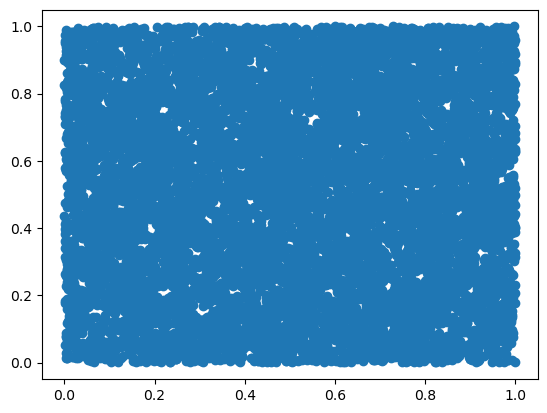

In [169]:
x = []
y = []

for i in range(10000):
    x.append(rng.generate_number())
    y.append(rng.generate_number())

plt.scatter(x, y)

plt.show()

Hago un histgrama con los numeros generados

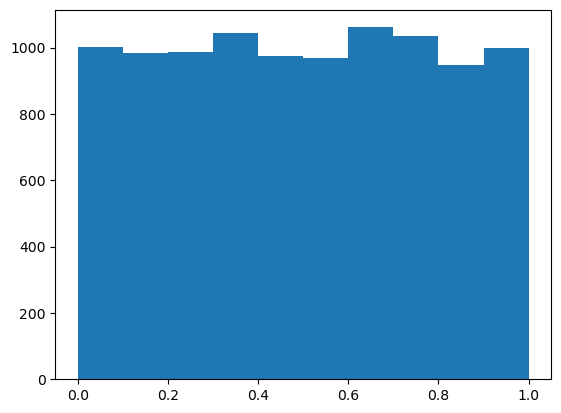

In [170]:
plt.hist(x)

plt.show()

## Ejercicio 2

En este ejercicio se busca aplicar distintos test estadísticos vistos en la materia para evaluar tanto el
comportamiento del generador de números pseudoaleatorios elegido como el comportamiento de otro generador
implementado por otro grupo. El grupo al cual le deben evaluar el generador se encuentra en la planilla de grupos
en Drive.
Para esta tarea se debe solicitar al equipo asignado uno o más lotes de números generados de los tamaños que se
necesiten. El equipo que haya generado los números debe incluir en la notebook entregada el código utilizado
para generar los mismos.


a) Sobre los generadores implementados en el ejercicio 1:
- Proponer, y realizar, al menos 3 tests para evaluar su comportamiento.
- Evaluar e interpretar los resultados de cada test para distintos tamaños de muestras.


b) Sobre el generador implementado por el grupo asignado:
- Proponer, y realizar, al menos 3 tests para evaluar su comportamiento.
- Evaluar e interpretar los resultados de cada test para distintos tamaños de muestras.
- Comparar los resultados obtenidos para este generados con los obtenidos en el punto a)

## Ejercicio 3

Un uso posible de los satélites es la captura de imágenes, como se expone en
el trabajo:
Chen, W., Mackin, S., & Palmer, P. (2006). Performance Modelling of Imaging
Service of Earth Observation Satellites with Two-dimensional Markov Chain.
57th International Astronautical Congress. 10.2514/6.IAC-06-B5.3.05
Utilizando el generador del ejercicio 1, y los datasets provistos junto a este
enunciado, se pide:

- Reproducir la generación de localizaciones de imágenes al azar,
mostrada en la figura 5: “Distribution of targets over the globe” de la
sección 4. Resultados. En este caso las imágenes se generan de forma
uniformemente distribuida dentro de los parámetros de latitud y
longitud [−60◦,60◦] [−150◦, 150◦] , respectivamente.


La cantidad de puntos dentro del rectángulo es:  2000


<Axes: >

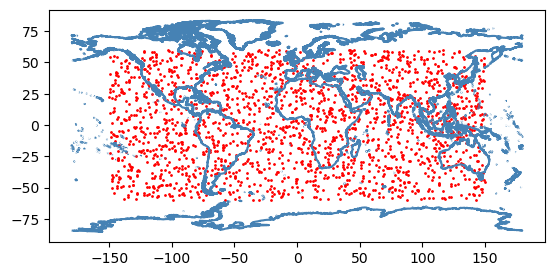

In [203]:
import geopandas as gpd
from shapely.geometry import Point

# Importamos el archivo del dataset
filename = './datasets ejercicio 3/WB_Coastlines_10m/WB_Coastlines_10m.shp'
gdf = gpd.read_file(filename)

# Declaramos los límites del rectángulo que vamos a usar para generar los puntos pseudoaleatorios
xmin = -150.0
xmax = 150.0
ymin = -60.0
ymax = 60.0

# Calculamos la extensión en cada eje de los límites del rectángulo
xext = xmax - xmin
yext = ymax - ymin

# Cantidad total de puntos a generar
pointcount = 2000

# Variable donde vamos a guardar los puntos generados
points = []

# Generamos puntos hasta obtener el total esperado 
while len(points) < pointcount:
    # Usamos nuestro generador de números pseudoaleatorios para obtener un punto dentro del rectángulo
    x = xmin + rng.generate_number() * xext
    y = ymin + rng.generate_number() * yext
    p = Point(x, y)

    # Agregamos el punto a la lista
    points.append(p)

print('La cantidad de puntos dentro del rectángulo es: ', len(points))

# Creamos una GeoSeries para los puntos dentro del rectángulo para poder graficarlos    
gs = gpd.GeoSeries(points)

# Creamos los gráficos    
fig, ax = plt.subplots()

gdf.plot(ax=ax, facecolor='none', edgecolor='steelblue')
gs.plot(ax=ax, color='r', markersize=1)

- Modificar el método para sólo generar localizaciones de imágenes
dentro del continente australiano (figuras 22 y 23 del dataset). De aplicar, en función del método elegido,
calcular el factor de rendimiento de forma empírica.

El área del polígono resultante es:  686.369584281038  (grado * grado) 

Las coordenadas de los límites del rectángulo alrededor de la geometría seleccionada 
en el formato (xmin, ymin, xmax, ymax) son:  (113.156979514, -39.14495208099993, 153.63062584700003, -10.687676690999922) 

Resultados para  100  muestras
La cantidad de puntos dentro del rectángulo es:  100
La cantidad total de puntos generados es:  184
El factor de rendimiento empírico es:  0.5434782608695652
El factor de rendimiento teórico es:  0.5959260644194525


Resultados para  500  muestras
La cantidad de puntos dentro del rectángulo es:  500
La cantidad total de puntos generados es:  855
El factor de rendimiento empírico es:  0.5847953216374269
El factor de rendimiento teórico es:  0.5959260644194525


Resultados para  1000  muestras
La cantidad de puntos dentro del rectángulo es:  1000
La cantidad total de puntos generados es:  1689
El factor de rendimiento empírico es:  0.5920663114268798
El factor de rendimiento teór

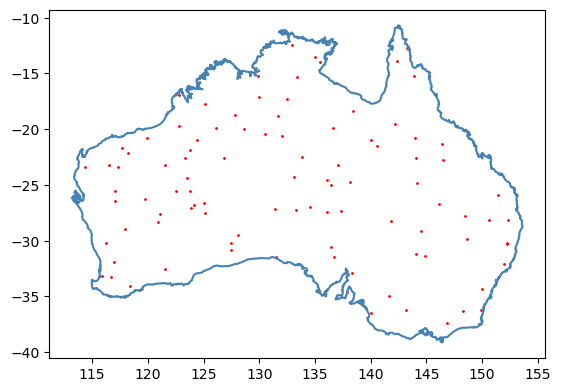

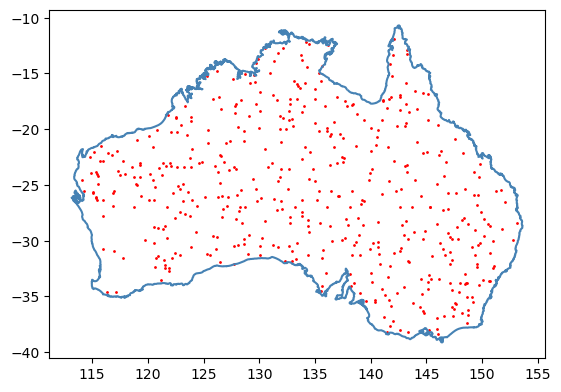

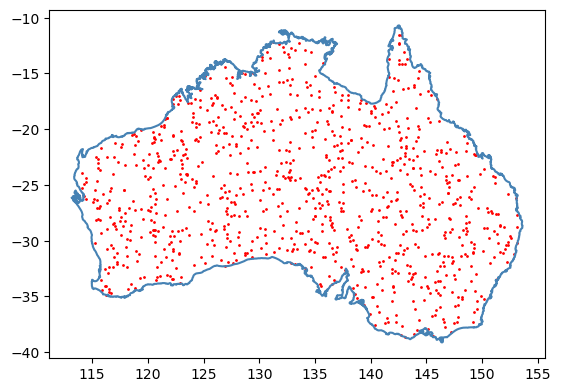

In [204]:
import geopandas as gpd
from shapely.ops import polygonize
from shapely.geometry import Point

# Importamos el archivo del dataset seleccionando las filas 22 y 23 para el continente australiano
filename = './datasets ejercicio 3/WB_Coastlines_10m/WB_Coastlines_10m.shp'
gdf = gpd.read_file(filename).iloc[[22, 23]]

# Creamos una unión unaria para los LineString de la geometría seleccionada
aoi_geom = gdf.unary_union

# Transformamos los LineString en un polígono con "polygonize"
polygon = list(polygonize(aoi_geom))[0]

print('El área del polígono resultante es: ', polygon.area, ' (grado * grado) \n')

# Obtenemos un rectángulo alrededor de la geometría seleccionada
bounds = aoi_geom.bounds

print('Las coordenadas de los límites del rectángulo alrededor de la geometría seleccionada ')
print('en el formato (xmin, ymin, xmax, ymax) son: ', bounds, '\n')

# Guardamos los bounds en variables
xmin, ymin, xmax, ymax = bounds

# Calculamos la extensión en cada eje de los límites del rectángulo
xext = xmax - xmin
yext = ymax - ymin

# Creamos distintos números de muestra
pointcount = [100, 500, 1000]

# Generamos puntos dentro del continente australiano para cada número de muestra
for samplecount in pointcount:
    # Cantidad total de puntos generados
    i=0

    # Variable donde vamos a guardar los puntos que caen dentro del continente australiano
    points = []
    
    # Generamos puntos dentro del rectángulo hasta obtener una cantidad igual al  
    # número de muestra dentro del continente australiano
    while len(points) < samplecount:

        # Usamos nuestro generador de números pseudoaleatorios para obtener un punto dentro del rectángulo
        x = xmin + rng.generate_number() * xext
        y = ymin + rng.generate_number() * yext
        p = Point(x, y)

        # Si el punto cae dentro del continente australiano lo agregamos a la lista
        if polygon.contains(p):  
            points.append(p) 
            
        # Aumentamos la cantidad de puntos generados
        i += 1
    
    print('Resultados para ', samplecount, ' muestras')
    print('La cantidad de puntos dentro del rectángulo es: ', len(points))
    print('La cantidad total de puntos generados es: ', i)
    
    print('El factor de rendimiento empírico es: ', len(points) / i)
    print('El factor de rendimiento teórico es: ', polygon.area / (xext * yext))
    print('\n')

    # Creamos una GeoSeries para los puntos dentro del continente australiano para poder graficarlos    
    gs = gpd.GeoSeries(points)

    # Creamos los gráficos    
    fig, ax = plt.subplots()
    
    gdf.plot(ax=ax, facecolor='none', edgecolor='steelblue')
    gs.plot(ax=ax, color='r', markersize=1)


## Ejercicio 4

Utilizando el generador de números pseudoaleatorios implementado en el ejercicio 1, y el trabajo
Li, Xiaomeng & li, Xingang & Wang, Jiangfeng. (2012). Using Cellular Automata to Investigate Pedestrian Conflicts
with Vehicles in Crosswalk at Signalized Intersection. Discrete Dynamics in Nature and Society. 2012.
10.1155/2012/287502.
Resolver:
- Simular al menos 2 escenarios planteados en el trabajo y comparar sus resultados.
- Proponer al menos 2 modificaciones a los escenarios planteados para peatones, autos, semáforos y
arterias de circulación, simularlas y comparar sus resultados.
- Realizar los gráficos que se consideren necesarios para mostrar los resultados
- Seleccionar un escenario de los simulados y realizar una animación utilizando los datos simulados

### Descripcion del escenario planteado:

Se utiliza un modelo de autómata celular para simular el tráfico.

Idealización del sistema físico en el que se supone que tanto el espacio como el tiempo son discretos y cada una de las unidades que
interactúan puede tener solo un número finito de estados discretos.
En los autómatas celulares el espacio se divide en muchas unidades, mediante métodos in-erráticos, cuadrícula con ciertas formas.
Cada unidad en la cuadrícula in-errática se llama celda, que solo puede tomar su valor en el conjunto de estados discretos limitados.
Todas las células siguen las mismas reglas de funcionamiento y dinámica discreta en la naturaleza y la sociedad.

Actualizar según las reglas parciales fijadas.
Un gran número de células constituyen la evolución del sistema dinámico mediante la simple interacción.
Los componentes más básicos de los autómatas celulares incluyen cuatro partes: celdas, espacio de celda, vecinos y reglas.
Además, también se debe incluir el estado de las celdas.

El modelo de autómata celular en el artículo se desarrolla para simular un cruce de peatones en una intersección señalizada con un
ciclo de tiempo de señal peatonal fijo de $90 s$.
La fase de la señal para peatones está diseñada en seis clases,
que tienen una duración de tiempo verde de $25 s$, $30 s$, $35 s$, $40 s$, $45 s$ y $50 s$, correspondientes a
$65 s$, $60 s$, $55 s$, $50 s$, $45 s$ y $40 s$ de duración del tiempo rojo, respectivamente.
El segmento de la carretera que conecta con la intersección está diseñado como carriles de dos vías para seis vehículos y
el ancho de cada carril es de 3,5 metros.
El ancho del paso de peatones también está diseñado en 6 clases, que son $2,5 m$, $3 m$, $3,5 m$, $4 m$, $4,5 m$ y $5 m$ con una longitud de cruce de $21 m$.
Además, se han establecido dos áreas de espera para peatones a ambos lados del paso de peatones con capacidad para 100 peatones como máximo cada vez.
En este modelo, el paso de peatones se divide en celdas cuadradas de $0,5 × 0,5 m^2$.
Cada celda está ocupada por un peatón o vacía. Las velocidades iniciales asignadas al peatón pueden ser 2, 3, 4, 5 o 6 celdas por segundo,
lo que representa que sus velocidades reales son $1 m/s$, $1,5 m/s$, $2 m/s$, $2,5 m/s$, y $3 m/s$, respectivamente.
Las proporciones de los cinco tipos de velocidades se basan en los resultados de la observación de campo,
que comparten 27,3%, 52%, 13,7%, 4,8% y 2,2% respectivamente. A través de la comparación de la velocidad asignada y
el número de celdas vacías frontales verticales, cada peatón actualiza su velocidad en cada paso de tiempo.
Se supone que cada vehículo ocupa 6 × 5 celdas y su velocidad en el cruce de peatones es de $5 m/s$.

Generalmente, existen dos tipos de condiciones de contorno en los modelos de simulación de autómatas celulares:
la condición de contorno periódica y la condición de contorno abierto.
Por razones tanto prácticas como teóricas, las dos condiciones de contorno son preferibles en diferentes situaciones.

- En la condición de frontera periódica, los límites relativos están vinculados y se genera un estado estacionario invariante de traducción en el sistema.
- Por otro lado, la condición de límite abierto concuerda con una cierta probabilidad cuando se inserta y retira un vehículo de la celda límite,
en la que la invariancia traslacional se rompe, pero aún se pueden esperar estados estacionarios con un perfil de densidad no trivial.

En comparación con la condición de frontera periódica, la condición de frontera abierta es más realista y coherente para el modelo del artículo.
Por tanto, se adopta la condición de frontera abierta.

### Reglas del escenario planteado:

#### Celdas:

Cada celda mide $0.5$ metros cuadrados ($0.5m × 0.5m$).

- Segmento de carretera: cuenta con dos carriles, para 6 vehiculos.
  - Carriles: ancho $3,5$ metros (7 celdas).
  - $4$ áreas de posibles coliciones.
- Paso de peatones:
  - Ancho: posibles valores $2,5 m$, $3 m$, $3,5 m$, $4 m$, $4,5 m$ y $5 m$.
  - Largo: longitud de cruce de $21 m$, que corresponde a los 6 carriles de carretera ($3.5 × 6 = 21$).
  - Pueden haber hasta 100 peatones esperando en el cruce.
- Cada celda solo puede estar ocupada por una entiidad a la vez.
  - Un peaton solo ocupa $1$ celda.
  - Un vehiculo ocupa $6 × 5$ celdas y su velocidad en el cruce de peatones es de $5 m/s$

#### Señales:

Total de periodo de semaforo $90 s$ (solo verde o rojo).
Fase de la señal para peatones (en segundos):

| Verde | Rojo |
|-------|------|
| 25    | 65   |
| 30    | 60   |
| 40    | 55   |
| 45    | 45   |
| 50    | 40   |

#### Movimiento:

Hay tres leyes básicas de movimiento en los modelos de autómatas celulares para describir el comportamiento de los peatones:

- movimiento lateral: representa el comportamiento de cambio de trayectoria de un peatón, cuyo resultado es obtener espacio de aceleración y evitar una colisión frontal.
- movimiento lineal: considera la velocidad de preferencia personal y otros peatones cercanos para identificar el número de pasos para avanzar.
- evitación de colisiones: se refiere al comportamiento de cómo evitar colisiones frontales entre peatones que caminan cerca uno del otro en dirección opuesta.

En la evolución de este modelo, tanto los peatones como los vehículos deben cumplir con las reglas de sus movimientos

#### Reglas para peatones:

Arribo, (es una distribucion Poisson).
$P_k = \frac{(λ_p)^{k}}{k!} × e^{-λt} = 0$

Donde:
- $P_k$ denota la probabilidad de alcanzar k peatones durante el intervalo de conteo t.
- $λ_p$ denota la tasa media de llegada de peatones cápita/segundo.
- $t$ denota cada intervalo de tiempo contado.

En la evolución de este modelo, los peatones dan prioridad a la celda frontal como destino.
El peatón puede avanzar en las celdas o cambiar a la izquierda o a la derecha cuando está bloqueado.

La velocidad inicial del peatón (en celdas) que ingresa al cruce de peatones $v_{i,j}$, se asigna de acuerdo con:
- 6 caso: $p > 0.978$
- 5 caso: $0.978 ≥ p > 0.93$
- 4 caso: $0.93 ≥ p > 0.793$
- 3 caso: $0.793 ≥ p > 0.273$
- 2 caso: $0.273 ≥ p ≥ 0$

Donde:
- $p$ es un número aleatorio entre 0 y 1.
- $v_{i,j}$ denota la velocidad del peatón cuya ubicación es $x_{i,j}$.

La dinámica discreta en la naturaleza y la sociedad La velocidad del peatón en el cruce de peatones durante la simulación
se actualiza sobre la base de $v_{i,j} = min(d_{i,j}, v_{i,j})$.
Donde:
- $d_{i,j}$ denota el número de celdas vacías entre el peatón objetivo y su peatón verticalmente frontal más cercano.
- $x_{i,j}$ denota la ubicación del peatón.
- $v_{i-n,j±1}$ denota la velocidad del peatón cuya ubicación es xi−n, j±1 y es el primero detrás de la celda xi, j±1. El número de celdas vacías entre ellas es n.

Debido a que varios peatones pueden competir por una celda vacía y cada celda puede estar vacía u ocupada exactamente por un peatón,
existirán conflictos entre peatones en la evolución del modelo. Si ocurren conflictos,
el sistema seleccionará un peatón para que ocupe la celda al azar con la misma probabilidad.
El peatón seleccionado se moverá al destino en el siguiente paso de tiempo y el peatón que no esté seleccionado permanecerá en su ubicación original.
Los peatones tienen que esperar en el área de espera una vez que llegan a la hora del semáforo en rojo y
se supone que todos los peatones siguen las reglas de tránsito sin ningún comportamiento intencional al pasar el semáforo en rojo.
El comportamiento de pasar el semáforo en rojo solo ocurre en los peatones que no han terminado de cruzar cuando termina el semáforo en verde.
Cuando comience la luz verde, comenzarán a cruzar a las velocidades asignadas y acelerarán a la velocidad máxima para completar el cruce
si la luz verde termina.

El modelo simplifica el proceso de conflicto entre peatones opuestos.
Los peatones en direcciones opuestas pueden cruzarse entre sí si su celda de destino está vacía; de lo contrario,
necesitarán ajustar sus velocidades o mantener su posición original.

#### Reglas para vehiculos:

La ley de llegada de los vehículos es la misma que la de los peatones,
que sigue de manera similar la distribución de Poisson. Su tasa de llegada es $λv$.

Cuando el semáforo para peatones está en rojo y no hay ningún peatón en el cruce de peatones,
los vehículos pueden cruzar por la intersección. De lo contrario, se enfrentarían a conflictos con los peatones.

#### Reglas para conflictos entre peatones y vehículos:

En el trabajo publicado, de acuerdo con la relación de ocupación temporal y espacial de los usuarios de la vía en la intersección,
los conflictos entre peatones y vehículos se clasifican en 4 áreas, en la que los conflictos entre peatones y vehículos se pueden diferenciar
en 4 tipos de la siguiente manera:

- Área 1: conflictos entre vehículos que giran a la derecha desde el interior de la intersección y peatones, asumiendo que se permite girar a la derecha en rojo en la aproximación.
- Área 2: conflictos entre vehículos que se mueven en línea recta o que giran a la izquierda desde el interior de la intersección y peatones que van a baja velocidad o aquellos que cruzan la calle al final de la luz verde, asumiendo que los vehículos no tienen comportamiento al pasar la luz roja.
- Área 3: conflictos entre vehículos del segmento que se mueven en línea recta o que giran a la izquierda y peatones con velocidad lenta o aquellos que cruzan la calle al final de la luz verde, asumiendo que los vehículos no tienen comportamiento de pasar la luz roja.
- Área 4: conflictos entre vehículos que giran a la derecha del segmento y peatones, asumiendo que se permite girar a la derecha en rojo en la aproximación.

Hay dos definiciones relacionadas con el conflicto involucradas en el trabajo publicado. Uno es el evento de conflicto entre peatones y vehículos,
y el otro es el retraso del conflicto de peatones.
En este estudio de simulación, un evento de conflicto entre vehículo y peatón en un cruce de peatones se define como la situación en la que,
para evitar una colisión con un peatón,
el vehículo deja de avanzar hacia las celdas que actualmente están ocupadas por al menos un peatón o que estarán ocupadas. por al menos un peatón.
La demora por conflicto de peatones significa el tiempo de parada durante el cual
los peatones se estancan en el cruce de peatones para evitar el paso de los vehículos cuando ocurre un conflicto.
Si se alivia el conflicto, los peatones podrán seguir cruzando. Las reglas de conflicto se asignan de la siguiente manera.

- Si la celda objetivo del peatón está ocupada por un vehículo, el vehículo tiene prioridad para cruzar. Del mismo modo, si la celda objetivo del vehículo está ocupada por peatones, se dará prioridad a los peatones.
- Si el peatón y el vehículo tienen la misma celda objetivo, lo que significa que sus próximos pasos se superponen, el sistema dará prioridad de paso a uno de ellos aleatoriamente con la misma probabilidad, es decir, 0,5.

### Codigo de resolucion

#### Constantes

La mayoria de los valores provienen de las reglas antes mencionadas.

In [49]:
# valores fijos definidos por las reglas

# tiempo maximo de periodo para el semaforo
TRAFFIC_LIGHT_TOTAL_TIME = 90
# lista de tiempos base que el semaforo está en verde
TRAFFIC_GREEN_LIGHT_BASE_TIME_POSSIBILITIES = (25, 30, 35, 40, 45, 50)
# valor de la velocidad inicial segun las posibilidades,
# ordenados segun su vínculo con la probabilidad
# la velocidad esta expresada en celdas/tiempo
PEDESTRIAN_INITIAL_VELOCITY_POSSIBILITIES = (6, 5, 4, 3, 2)
# valor de la probabilidad velocidad inicial segun las posibilidades
# (ordenados de mayor a menor)
PROBABILITY_PEDESTRIAN_INITIAL_VELOCITY_POSSIBILITIES = (0.978, 0.93, 0.793, 0.273, 0.0)
# probabilidad de prioriedad de movimiento del peaton ante un vehiculo
PROBABILITY_PEDESTRIAN_PRIORITY_BEFORE_VEHICLE = 0.5
# tamaño de vehiculo
VEHICLE_SIZE_BROAD = 5
VEHICLE_SIZE_LONG = 6
# velocidad de vehiculo (1 metro = 2 celdas)
# la velocidad esta expresada en celdas/tiempo
VEHICLE_SPEED = 10
# tamaño del carril
LANE_SIZE_BROAD = 7
# cantidad de carriles
NUMBER_OF_LANES = 6
# Posibles ancho del paso de peatones (1 metro = 2 celdas)
CROSSWALKS_WIDTH_POSSIBILITIES = (5, 6, 7, 8, 9, 10)
# el largo del paso de peatones son 21 metros que son 42 celdas que equivale a los 6 carriles
CROSSWALKS_LARGE_POSSIBILITIES = 42
# verificacion (por posibles cambios)
if CROSSWALKS_LARGE_POSSIBILITIES != LANE_SIZE_BROAD * NUMBER_OF_LANES:
    raise ValueError("el tamaño de los carriles y el largo de la senda peatonal no coinciden")
# cantidad de peatones maxima en espera al borde de la senda peatonal
WAITING_PEDESTRIAN_CAPACITY = 100
# cantidad de segundos que se simularan
SECONDS_IN_HOUR = 3600
# cantidadd e zonas de espera de peatones
NUMBER_OF_WAITING_PEDESTRIAN = 2
# identificador de arrivos de peatones
ARRIVAL_PEDESTRIAN_RIGHT = "right"
ARRIVAL_PEDESTRIAN_LEFT = "left"
# Como se representara el vehiculo en el tablero
REPRESENTATION_OF_THE_VEHICLE = "V"
# El vehiculo por su velocidad atraviesa el tablero completamente en un segundo esta es la marca que deja
REPRESENTATION_OF_VEHICLE_PASSAGE = "T"

#### Parametros

Valores predefinidos para la simulacion.

In [50]:
def get_vehicle_arrival_rate(n=6):
    result = []
    for i in range(1, n + 1):
        result.append(0.02 * i)
    return result

def get_pedestrian_arrival_rate(base=1000.0,n=10):
    arrival_rate_base = base / SECONDS_IN_HOUR
    result = []
    for i in range(1, n + 1):
        result.append(arrival_rate_base * i)
    return result

SEED_BASE_TO_PEDESTRIAN = 98
SEED_BASE_TO_CROSS = 45000

#### Funciones

In [51]:
"""receives a vector with pedestrians and a uniform random value between 0 and 1, returns a pedestrian"""
def pedestrian_selection_for_cell(pedestrians, val_p):
    # caso donde el valor inicial era 1
    if val_p == 1.0:
        return pedestrians[-1]
    # obtengo la cantidad de peatones que compiten por la celda
    cant = len(pedestrians)
    # el valor aleatorio es entre 0 y 1 lo ultiplico por la cantidad
    # asi obtengo un valor aleatorio entre 0 y la cantidad
    # se le aplica int para eliminar los decimales
    random_pos = int(val_p * cant)
    return pedestrians[random_pos]

"""Test of pedestrian_initial_velocity"""
def test_pedestrian_selection_for_cell():
    vec = (0, 1, 2, 3, 4)
    val = pedestrian_selection_for_cell(vec, 0.0) == 0
    val &= pedestrian_selection_for_cell(vec, 1.0) == 4
    val &= pedestrian_selection_for_cell(vec, 0.2) == 1
    val &= pedestrian_selection_for_cell(vec, 0.4) == 2
    val &= pedestrian_selection_for_cell(vec, 0.6) == 3
    val &= pedestrian_selection_for_cell(vec, 0.8) == 4
    val &= pedestrian_selection_for_cell(vec, 0.19) == 0
    val &= pedestrian_selection_for_cell(vec, 0.39) == 1
    val &= pedestrian_selection_for_cell(vec, 0.59) == 2
    val &= pedestrian_selection_for_cell(vec, 0.79) == 3
    if val:
        print("OK")
    else:
        print("ERROR")

test_pedestrian_selection_for_cell()

OK


In [52]:
"""receives a random value between 0 and 1, uses that value to know if the pedestrian has priority over a vehicle competing for the same cell, returns true if the pedestrian has priority"""
def pedestrian_priority_before_vehicle(vel_p):
    return vel_p < PROBABILITY_PEDESTRIAN_PRIORITY_BEFORE_VEHICLE

In [53]:
"""given a random value and two vectors, one of values ordered from highest to lowest and another of results.
It will return the equivalent of the results according to the largest number in the vector to which the random value is greater."""
def get_discrete_value_according_to_probability(val_p, interval, vec):
    # verifica que sea mayor al numero del vector
    # (el vector empieza ordenado como pre condicion)
    for i in range(len(interval)):
        if val_p > interval[i]:
            return vec[i]
    # caso nulo retorna el ultimo valor
    return vec[-1]

"""given a random value it will return The initial speed of the pedestrian entering the crosswalk,
according to the previous rules."""
def pedestrian_initial_velocity(val_p):
    # valor de la velocidad segun las reglas
    vec = PEDESTRIAN_INITIAL_VELOCITY_POSSIBILITIES
    # probabilidad del valor de la velocidad segun las reglas
    interval = PROBABILITY_PEDESTRIAN_INITIAL_VELOCITY_POSSIBILITIES
    return get_discrete_value_according_to_probability(val_p, interval, vec)

"""Test of pedestrian_initial_velocity"""
def test_pedestrian_initial_velocity():
    val = pedestrian_initial_velocity(1.0) == 6
    val &= pedestrian_initial_velocity(0.979) == 6
    val &= pedestrian_initial_velocity(0.978) == 5
    val &= pedestrian_initial_velocity(0.931) == 5
    val &= pedestrian_initial_velocity(0.930) == 4
    val &= pedestrian_initial_velocity(0.794) == 4
    val &= pedestrian_initial_velocity(0.793) == 3
    val &= pedestrian_initial_velocity(0.274) == 3
    val &= pedestrian_initial_velocity(0.273) == 2
    val &= pedestrian_initial_velocity(0.001) == 2
    val &= pedestrian_initial_velocity(0.0) == 2
    if val:
        print("OK")
    else:
        print("ERROR")

test_pedestrian_initial_velocity()

OK


In [54]:
def exponencial(val_p, value_lambda):
    return -(np.log(1 - val_p)) / value_lambda

def generate_arrivals(seed, seconds, value_lambda):
    result = []
    total = 0.0
    # generador de numeros aleatorios
    random = MixmaxRNG(seed, MATRIX_SIZE, MAGIC_NUMBER, MAGIC_MODULUS)
    while total < seconds:
        # nuevo arrivo en segundos
        exp = exponencial(random.generate_number(), value_lambda)
        # tiempo acumulado de arrivo
        total += exp
        if total > seconds:
            break
        # se agrega el tiempo acumulado
        result.append(total)
    return result

def histogram_to_list(arrivals):
    vals_to_count = [int(i) for i in arrivals]
    hist = Counter(vals_to_count)
    return hist

arrivals = generate_arrivals(27, 100, 1)
hist = histogram_to_list(arrivals)
print(hist, len(hist), sum(hist.values()))

Counter({66: 7, 6: 3, 13: 3, 16: 3, 22: 3, 33: 3, 88: 3, 89: 3, 4: 2, 5: 2, 12: 2, 17: 2, 28: 2, 29: 2, 31: 2, 32: 2, 37: 2, 40: 2, 43: 2, 49: 2, 72: 2, 75: 2, 78: 2, 80: 2, 91: 2, 0: 1, 8: 1, 9: 1, 10: 1, 11: 1, 18: 1, 20: 1, 21: 1, 23: 1, 25: 1, 27: 1, 30: 1, 34: 1, 38: 1, 46: 1, 47: 1, 48: 1, 53: 1, 55: 1, 57: 1, 61: 1, 62: 1, 69: 1, 70: 1, 76: 1, 77: 1, 81: 1, 82: 1, 84: 1, 85: 1, 90: 1, 96: 1}) 57 94


#### Tipos

In [55]:
"""representation of the specific location of the board"""
class Cell:
    def __init__(self):
        # quien ocupa la celda
        self.content = None
        # cantidad de pretendientes a ocupar la celda
        self.pretenders = []

    def is_empty(self):
        return self.content is None

    def transfer(self, new_content=None):
        if not new_content is None and not self.content is None:
            raise ValueError("ERROR, Transfer to occupied cell")
        self.content = new_content

    def draw_view(self):
        if self.content is None:
            return " "
        return self.content.draw_view()

    def contain_pedestrian(self):
        if self.content is None:
            return False
        return self.content.is_pedestrian()

    def get_contain(self):
        return self.content

    def add_pretender(self, pretender):
        if not pretender.is_pedestrian():
            raise TypeError("ERROR, Pedestrian expected.")
        self.pretenders.append(pretender)

    def select_pretender(self, val_p):
        # intervalos de probabilidad
        interval = []
        # cantidad de pretendientes a ocupar la celda
        n_pretenders = len(self.pretenders)
        base_p = 1 / n_pretenders
        for n in range(n_pretenders):
            # se le suma 1 a n por que inicia en 0
            interval.append(1 - (base_p * (n + 1)))
        self.content = get_discrete_value_according_to_probability(val_p, interval, self.pretenders)
        # anula los anteriores pretendientes
        self.pretenders = []
        # el peaton pretendiente se traslada a la celda
        return self.content.transfer()

In [56]:
class PedestrianWaitingSpace:
    def __init__(self, pedestrian_arrivals, initial_time=0, seed_to_pedestrian=1):
        self.waiting_quantity = 0
        self.waiting_capacity = WAITING_PEDESTRIAN_CAPACITY
        self.pedestrian_arrivals = pedestrian_arrivals
        self.tick(False, initial_time)
        self.seed_to_pedestrian = seed_to_pedestrian

    def tick(self, is_green_light, actual_time):
        # se obtiene la cantidad de arrivos en el tiempo dado
        pedestrian_arrivals = self.pedestrian_arrivals[actual_time]
        # caso donde se supera la cantidad maxima de peatones solo llega al maximo
        if self.waiting_quantity + pedestrian_arrivals > WAITING_PEDESTRIAN_CAPACITY:
            self.waiting_quantity = WAITING_PEDESTRIAN_CAPACITY
        else:
            # el valor aleatorio crea N peatones en espera
            self.waiting_quantity += pedestrian_arrivals
        # caso de semaforo verde: los peatones intentan moverse para salir de la espera
        if is_green_light:
            # Se comunica con el tablero para decir que hay peatones a moverse
            return self.waiting_quantity
        # caso de semaforo rojo: siguen esperando
        return 0

    def pedestrians_waiting(self):
        return self.waiting_quantity

    """generates a pedestrian in a position with a movement to one side."""
    def generate_pedestrian(self, pos, to_right):
        # caso de intentar generar peaton cuando no hay peatones esperando
        if self.waiting_quantity == 0:
            raise BufferError("Error, waiting quantity equal to cero.")
        # peaton que saldra de la zona de espera
        result = Pedestrian(pos, to_right, self.seed_to_pedestrian)
        # debe incrementa de a zonas de esperas ya que cada zona tendra un valor que difiere en una cantidad menor
        self.seed_to_pedestrian += NUMBER_OF_WAITING_PEDESTRIAN
        # el peaton sale de la zona de espera
        self.waiting_quantity -= 1
        return result

In [57]:
class TraficLane:
    def __init__(self, vehicle_arrivals, from_upper, cells_to_pass, green_driving=False, initial_time=0):
        self.from_upper = from_upper
        self.vehicle_arrivals = vehicle_arrivals
        self.green_driving = green_driving
        self.waiting_quantity = 0
        self.cells_to_pass = cells_to_pass
        self.tick(False, initial_time)
        # cantidad de celdas extra que tienen que esperar los vehiculos
        self.wait_cells = 0

    def tick(self, is_green_light, actual_time):
        # caso si no hay vehiculos en espera
        if self.waiting_quantity == 0:
            self.wait_cells = 0
        # se obtiene la cantidad de arrivos en el tiempo dado
        self.waiting_quantity += self.vehicle_arrivals[actual_time]
        # caso de carril bloqueado no se traslada
        if self._is_blocked_lane():
            return 0
        # caso de conduccion en verde NO permitida y caso de semaforo verde: se detiene y espera
        if not self.green_driving and is_green_light:
            return 0
        # caso de conduccion en verde permitida o caso de semaforo rojo: se intenta trasladar
        return self.waiting_quantity

    def vehicles_waiting(self):
        return self.waiting_quantity

    """returns true if there is at least one locked cell"""
    def _is_blocked_lane(self):
        # busco en todas las celdas pertinentes al paso del vehiculo
        for cell in self.cells_to_pass:
            # caso donde la celda NO vacia y contiene un peaton
            if not cell.is_empty() and cell.contain_pedestrian():
                return True
        return False

    def is_lane_reserver_for_vehicles(self):
        # busco en todas las celdas pertinentes al paso del vehiculo
        for cell in self.cells_to_pass:
            # caso donde la celda NO vacia y NO contiene un peaton
            if cell.is_empty() or cell.contain_pedestrian():
                return False
        return True

    def get_cells(self):
        return self.cells_to_pass

    def generate_vehicle(self):
        # caso de intentar generar vehiculo cuando no hay vehiculos esperando
        if self.waiting_quantity == 0:
            raise BufferError("Error, waiting quantity equal to cero.")
        vehicle = Vehicle(self.from_upper)
        self.waiting_quantity -= 1
        return vehicle

    def set_pass_croswalk(self):
        # largo total de autos que pasan (caso donde todos los que esperan pasan)
        total_length = self.waiting_quantity * VEHICLE_SIZE_LONG
        # los que siguen en espera
        wait_length = total_length - VEHICLE_SPEED
        # caso donde quedan celdas donde transito el auto pero ya paso
        if wait_length < 0:
            cant_to_pass = (-wait_length) * VEHICLE_SIZE_BROAD
            n = 0
            for cell in self.cells_to_pass:
                if self.from_upper:
                    comp = lambda x: x < cant_to_pass
                else:
                    cant_total = len(self.cells_to_pass) / VEHICLE_SIZE_BROAD
                    comp = lambda x: x > (cant_total - cant_to_pass)
                if comp(n):
                    cell.transfer(VehicleTransition())
                else:
                    cell.transfer(Vehicle())
                n += 1
        # caso donde todavia no terminaron de pasar los autos
        else:
            for cell in self.cells_to_pass:
                cell.transfer(Vehicle())
        # solo pueden pasar 2 como maximo ya que el largo de los coches es de 6 y se mueven a 10
        # pero el proximo debera esperar 2 celdas mas atras
        if VEHICLE_SIZE_LONG + self.wait_cells < VEHICLE_SPEED:
            self.wait_cells += 2
            result = 2
        # caso donde se acumularon tantos coches que solo pasa uno nuevo
        else:
            self.wait_cells = (VEHICLE_SIZE_LONG + self.wait_cells) % VEHICLE_SPEED
            result = 1
        return min(result, self.waiting_quantity)

In [58]:
"""representation of a pedestrian traffic light"""
class TraficLight:
    def __init__(self, green_pos):
        self.green_time = 0
        self.red_time = 0
        # actualizo el tiempo de las luces
        self._traffic_light_times(green_pos)
        # caso de falla por parametro incorrecto
        if self.green_time == 0 or self.red_time == 0 or self.red_time == TRAFFIC_LIGHT_TOTAL_TIME:
            raise ValueError("Error, in creation of the traffic light.")
        # tiempo actual perteneciente al periodo NO ES EL TIEMPO TOTAL
        self.actual_time = 0

    def _traffic_light_times(self, green_pos):
        types_traffic_green_light_base_time = TRAFFIC_GREEN_LIGHT_BASE_TIME_POSSIBILITIES
        if green_pos > len(types_traffic_green_light_base_time) or green_pos < 0:
            raise ValueError("Not exist traffic light base time type. Existing types 0 to " + str(len(types_traffic_green_light_base_time)) + ". wrong type entered: " + green_pos)
        self.green_time = types_traffic_green_light_base_time[green_pos]
        self.red_time = TRAFFIC_LIGHT_TOTAL_TIME - self.green_time

    def is_green_light(self):
        # inicia el semaforo en verde luego se pasa a rojo
        return self.actual_time < self.green_time

    def is_initial_period(self):
        return self.actual_time == 0

    def tick(self):
        # el tiempo actual varia en el rango de [0;90)
        self.actual_time = (self.actual_time + 1) % TRAFFIC_LIGHT_TOTAL_TIME

In [59]:
"""representation of the board where the simulation occurs"""
class Cross:
    def __init__(self, crosswalks_width, pedestrian_arrivals, vehicle_arrivals, green_pos, seed_to_pedestrian=1, seed_cross=SEED_BASE_TO_CROSS):
        # Creacion del cruze peatonal
        self.matriz = self._generate_matriz(crosswalks_width)
        # Creacion de las zonas de esperas de los peatones
        self.pedestrian_waiting_space_rigth = PedestrianWaitingSpace(pedestrian_arrivals[ARRIVAL_PEDESTRIAN_RIGHT], seed_to_pedestrian=seed_to_pedestrian)
        self.pedestrian_waiting_space_left = PedestrianWaitingSpace(pedestrian_arrivals[ARRIVAL_PEDESTRIAN_LEFT], seed_to_pedestrian=seed_to_pedestrian+1)
        # Creacion de la luz de trafico peatonal
        self.trafic_light = TraficLight(green_pos)
        # Creacion de los carriles
        self.lanes = []
        for n_lane in range(NUMBER_OF_LANES):
            cells_to_vehicles = self._get_cells_to_vehicle(n_lane)
            lane = TraficLane(vehicle_arrivals[n_lane], self._lane_is_upper(n_lane), cells_to_vehicles, self._lane_is_green_move(n_lane))
            self.lanes.append(lane)
        # tiempo total de la simulacion
        self.actual_time = 0
        # generador aleatorio para resolucion de conflictos de celda
        self.random_generator = MixmaxRNG(seed_cross, MATRIX_SIZE, MAGIC_NUMBER, MAGIC_MODULUS)

    def _get_cells_to_vehicle(self, n_lane):
        # LANE = 7 = 1 + VEHICLE_SIZE_BROAD + 1
        margin = (LANE_SIZE_BROAD - VEHICLE_SIZE_BROAD) / 2
        # caso de error de cuentas
        if margin * 2 + VEHICLE_SIZE_BROAD != LANE_SIZE_BROAD:
            raise ValueError("Error, in margin of line.")
        # calculo de celdas, tener en cuenta que los autos van a 10 celdas por segundo y el ancho maximo del cruce es de 7 celdas
        cells = []
        for crosswalk in self.matriz:
            # debe ser 7N + 1
            left = int(n_lane * LANE_SIZE_BROAD + margin)
            # debe ser 7(N+1) - 1
            rigth = int((n_lane + 1) * LANE_SIZE_BROAD - margin)
            cells_cros_walk = crosswalk[left:rigth]
            # caso de calculo fallido
            if len(cells_cros_walk) != VEHICLE_SIZE_BROAD:
                raise ValueError("Error, in get borders of cross walk cells.")
            cells.extend(cells_cros_walk)
        return cells


    @staticmethod
    def _lane_is_upper(n_lane):
            # La primer mitad de los carriles los autos van desde la parte superior del tablero
            if n_lane < NUMBER_OF_LANES / 2:
                return True
            return False

    @staticmethod
    def _lane_is_green_move(n_lane):
            # Solo los carriles del borde pueden moverse en luz peatonal verde
            if n_lane == 0 or n_lane == (NUMBER_OF_LANES - 1):
                return True
            return False

    @staticmethod
    def _generate_matriz(crosswalks_width):
        crosswalks = []
        for i in range(crosswalks_width):
            # representacion del camino recto que deberian seguir los peatones
            crosswalk = []
            for j in range(CROSSWALKS_LARGE_POSSIBILITIES):
                crosswalk.append(Cell())
            crosswalks.append(crosswalk)
        return crosswalks

    def get_distance_to_next_obstacle(self, initial_pos, rigth):
        # esta funcion solo es aplicada a peatones
        # "rigth" hace referencia a la derecha desde la perspectiva del tablero
        # el equivalente (respecto al peaton) de "rigth" o "left" en este caso seria solo "forward"
        # obtengo el camino por el cual se avanzara
        crosswalk = self.matriz[initial_pos[0]]
        # obtengo la velocidad maxima posible del peaton
        max_vel_pedestrian = max(PEDESTRIAN_INITIAL_VELOCITY_POSSIBILITIES)
        # caso donde se mueve a la derecha
        if rigth:
            if initial_pos[1] + 1 >= len(crosswalk):
                return 2
            route = range(initial_pos[1] + 1, len(crosswalk) + 1)
            result = self._aux_distance_to_next_obstacle(crosswalk, route, max_vel_pedestrian, len(crosswalk), True)
        # caso donde se mueve a la izquierda
        else:
            if initial_pos[1] - 1 < 0:
                return 2
            route = range(initial_pos[1] - 1, -1, -1)
            result = self._aux_distance_to_next_obstacle(crosswalk, route, max_vel_pedestrian, 0, False)
        return result

    @staticmethod
    def _aux_distance_to_next_obstacle(crosswalk, range_of_motion, limit, finish, is_rigth_movent):
        result = 0
        # esta variable indica la cantidad de celdas que el peaton puede atravezar pero no detenerse en ellas
        traversable_previous_cells = 0
        for n in range_of_motion:
            # caso donde la celda es la ultima
            # if (is_rigth_movent and n > finish) or n == finish or (not is_rigth_movent and n < finish):
            if n == finish:
                # se le suma dos, uno por la celda no bloqueada y otro por la finalizacion del recorrido
                return result + 2
            # caso donde la celda No esta vacia
            if not crosswalk[n].is_empty():
                # Caso donde la celda esta ocupada por un NO peaton Y caso de celda ocupada por peaton que va en mismo sentido
                if not crosswalk[n].contain_pedestrian() or (crosswalk[n].contain_pedestrian() and crosswalk[n].get_contain().is_moving_rigth() == is_rigth_movent):
                    return result
                # Caso donde los peatones van en sentido contrario
                traversable_previous_cells += 1
                continue
            # ACA la celda esta disponible para que el peaton pueda ir hacia ella y ocuparla
            # ya que el peaton puede aceder a la celda se le agrega las celdas anteriores que son atravezables pero no estacionarias
            result += traversable_previous_cells
            # se resetea el contador de celdas atravezables
            traversable_previous_cells = 0
            result += 1
            # no tiene sentido indicar una distancia mayor a la capacidad de recorrerla para el peaton
            # caso donde hay mas espacio libre que la distancia maxima que puede recorrer en un segundo
            if result >= limit:
                return result
        return result

    def lateral_movement_allowed(self, initial_pos, rigth):
        # "rigth" hace referencia a la derecha desde la perspectiva del peaton
        # el equivalente (respecto al tablero) de "rigth" es arriba y de "left" abajo
        if rigth:
            new_x = initial_pos[0] - 1
            if new_x < 0:
                return False
            new_pos = (new_x, initial_pos[1])
        else:
            new_x = initial_pos[0] + 1
            if new_x >= len(self.matriz):
                return False
            new_pos = (new_x, initial_pos[1])
        return self._get_pos(new_pos).is_empty()

    def get_lateral_movement_allowed(self, initial_pos, rigth):
        # todo corregir esta funcion
        # "rigth" hace referencia a la derecha desde la perspectiva del peaton
        # el equivalente (respecto al tablero) de "rigth" es arriba y de "left" abajo
        if rigth:
            new_x = initial_pos[0] - 1
            if new_x < 0:
                return initial_pos
            new_pos = (new_x, initial_pos[1])
        else:
            new_x = initial_pos[0] + 1
            if new_x >= len(self.matriz):
                return initial_pos
            new_pos = (new_x, initial_pos[1])
        return new_pos

    def _get_pos(self, pos):
        # retorna la celda de la matriz
        return self.matriz[pos[0]][pos[1]]

    """The execution of this function involves the passage of one second"""
    def tick(self):
        # Los ticks representan en este problema el paso de un segundo
        # Actualizo el semaforo
        self.trafic_light.tick()
        # Obtengo el estado de la luz del semaforo
        green_light = self.trafic_light.is_green_light()
        # Actualizo las zonas de espera de los peatones
        waiting_rigth = self.pedestrian_waiting_space_rigth.tick(green_light, self.actual_time)
        waiting_left = self.pedestrian_waiting_space_left.tick(green_light, self.actual_time)
        # # Actualizo los carriles
        # waiting_vehicle = []
        # for line in self.lanes:
        #     waiting_vehicle.append(line.tick(green_light, self.actual_time))
        # Actualizo a los peatones
        self._update_crosswalk_vehicle(green_light)
        self._update_crosswalk(waiting_rigth, waiting_left)
        self.actual_time += 1

    def _update_crosswalk_vehicle(self, green_light):
        # verifico si hay autos que quieren pasar
        for lane in self.lanes:
            # cantidad de autos que quieren pasasr
            vehicle = lane.tick(green_light, self.actual_time)
            # ningun auto quiere pasar
            if vehicle == 0:
                # caso donde el carril estaba reservado para vehiculos y ningun vehiculo quiere pasar
                if lane.is_lane_reserver_for_vehicles():
                    # limpio la reserva de vehiculos
                    for cell in lane.get_cells():
                        cell.transfer()
                continue
            # al menos un auto compite con los peatones para pasar
            # se toma un valor al azar uniforme
            val_uniform = self.random_generator.generate_number()
            # si el valor supera la prioriedad de los peatones pasa el vehiculo
            if not pedestrian_priority_before_vehicle(val_uniform) or lane.is_lane_reserver_for_vehicles():
                # se bloquean las celdas para que pasen los vehiculos
                n_vehicles_pass = lane.set_pass_croswalk()
                # se crean los vehiculos
                for _ in range(n_vehicles_pass):
                    _ = lane.generate_vehicle()
    
    def _update_crosswalk(self, waiting_rigth, waiting_left):
        # todo esta funcion puede partirse en mas funciones refactorizar
        # # numero de carril
        # n_lane = 0
        # # verifico si hay autos que quieren pasar
        # for vehicle in waiting_vehicle:
        #     # carril de los autos
        #     lane = self.lanes[n_lane]
        #     n_lane += 1
        #     # ningun auto quiere pasar
        #     if vehicle == 0:
        #         # caso donde el carril estaba reservado para vehiculos y ningun vehiculo quiere pasar
        #         if lane.is_lane_reserver_for_vehicles():
        #             # limpio la reserva de vehiculos
        #             for cell in lane.get_cells():
        #                 cell.transfer()
        #         continue
        #     # al menos un auto compite con los peatones para pasar
        #     # se toma un valor al azar uniforme
        #     val_uniform = self.random_generator.generate_number()
        #     # si el valor supera la prioriedad de los peatones pasa el vehiculo
        #     if not pedestrian_priority_before_vehicle(val_uniform) or lane.is_lane_reserver_for_vehicles():
        #         # se bloquean las celdas para que pasen los vehiculos
        #         n_vehicles_pass = lane.set_pass_croswalk()
        #         # se crean los vehiculos
        #         for _ in range(n_vehicles_pass):
        #             _ = lane.generate_vehicle()

        # todo hay un bug que hace que los peatones se muevan mal, verificar la direccion
        # analizo todas las celdas en busca de los peatones
        # lista de todos las posiciones de celdas con peatones
        pos_pedestrian_cells = self._get_all_pos_cells_whit_pedestrian()
        # lista de celdas pretendidas por peatones
        pedestrian_intended_cells = []
        for pos in pos_pedestrian_cells:
            # obtengo la celda
            celda = self.matriz[pos[0]][pos[1]]
            # obtengo el peaton
            pedestrian = celda.get_contain()
            # obtengo si el peaton se mueve hacia la derecha o izquierda
            moving_right = pedestrian.is_moving_rigth()
            # obtengo siguiente obstaculo en su camino
            next_obstacle = self.get_distance_to_next_obstacle(pos, moving_right)
            # obengo velocidad final del peaton
            pedestrian_velocity = pedestrian.get_velocity_final(next_obstacle)
            # caso donde no puede mover hacia adelante
            if pedestrian_velocity == 0:
                to_up = pedestrian.to_upper()
                # delta_x = -1 if to_up else 1
                # movimiento lateral
                # primero intenta moverse a donde quiere el peaton
                if self.lateral_movement_allowed(pos, to_up):
                    # new_pos = (pos[0] + delta_x, pos[1])
                    new_pos = self.get_lateral_movement_allowed(pos, to_up)
                    self._agregate_to_intended_cells(pedestrian, new_pos, pedestrian_intended_cells)
                # caso donde no consigue lugar trata de moverse al lado contrario
                elif self.lateral_movement_allowed(pos, not to_up):
                    # new_pos = (pos[0] + delta_x, pos[1])
                    new_pos = self.get_lateral_movement_allowed(pos, to_up)
                    self._agregate_to_intended_cells(pedestrian, new_pos, pedestrian_intended_cells)
                else:
                    # si no se puede mover hacia adelante o hacia atras no hace nada
                    continue
            elif moving_right:
                pos_y = pos[1] + pedestrian_velocity
                # caso donde el peaton cruza completamente
                if pos_y >= CROSSWALKS_LARGE_POSSIBILITIES:
                    celda.transfer()
                else:
                    new_pos = (pos[0], pos_y)
                    self._agregate_to_intended_cells(pedestrian, new_pos, pedestrian_intended_cells)
            else:
                pos_y = pos[1] - pedestrian_velocity
                # caso donde el peaton cruza completamente
                if pos_y < 0:
                    celda.transfer()
                else:
                    new_pos = (pos[0], pos_y)
                    self._agregate_to_intended_cells(pedestrian, new_pos, pedestrian_intended_cells)
        for intended_cell in pedestrian_intended_cells:
            # genero valor aleatorio para saber que peaton se mueve
            val_p = self.random_generator.generate_number()
            # traslado al peaton a su nueva celda
            ex_pos = intended_cell.select_pretender(val_p)
            # elimino de la vieja celda al peaton para que solo ocupe una celda a la vez
            self.matriz[ex_pos[0]][ex_pos[1]].transfer()

        # una vez que los peatones del cruce se movieron calculo los peatones de la zonas de espera
        for pedastrian_izq in range(waiting_left):
            # los peatones que esperan a izquierda se mueven a derecha
            self._generate_pedestrian_for_wait_zone(True)
        for pedastrian_der in range(waiting_rigth):
            # los peatones que esperan a derecha se mueven a izquierda
            self._generate_pedestrian_for_wait_zone(False)
        return

    def _get_all_pos_cells_whit_pedestrian(self):
        result = []
        for n_crosswalk, crosswalk in enumerate(self.matriz):
            for n_cell, cell in enumerate(crosswalk):
                # caso de celda no vacia que contiene un peaton
                if not cell.is_empty() and cell.contain_pedestrian():
                    # posicion actual de la celda
                    pos = (n_crosswalk, n_cell)
                    result.append(pos)
        return result

    def _agregate_to_intended_cells(self, pedestrian, new_pos, pedestrian_intended_cells):
        pedestrian.possibilitie_transfer(new_pos)
        pos_cross = new_pos[0]
        pos_dist = new_pos[1]
        intended_cell = self.matriz[pos_cross][pos_dist]
        intended_cell.add_pretender(pedestrian)
        if not intended_cell in pedestrian_intended_cells:
            pedestrian_intended_cells.append(intended_cell)

    def _select_one_cross_random(self):
        max_pos = len(self.matriz)
        n_random = int(self.random_generator.generate_number((0, max_pos)))
        # caso donde se va de scope
        if n_random == max_pos:
            return 0
        # retorno el numero de cruce
        return n_random

    def _generate_pedestrian_for_wait_zone(self, to_rigth):
        n_cross = self._select_one_cross_random()
        if to_rigth:
            origin = -1
            wait_zone = self.pedestrian_waiting_space_left
        else:
            origin = CROSSWALKS_LARGE_POSSIBILITIES
            wait_zone = self.pedestrian_waiting_space_rigth
        dist = self.get_distance_to_next_obstacle((n_cross, origin), to_rigth)
        if dist == 0:
            return
        if not to_rigth:
            dist = CROSSWALKS_LARGE_POSSIBILITIES - dist
        # caso borde
        if not self.matriz[n_cross][dist].is_empty():
            return
        pedestrian = wait_zone.generate_pedestrian((n_cross, dist), to_rigth)
        self.matriz[n_cross][dist].transfer(pedestrian)
        return

    # Info estadistica

    """It is the beginning of the traffic light period"""
    def is_initial_period(self):
        return self.trafic_light.is_initial_period()

    """returns the number of pedestrians who failed to complete the crossing"""
    def get_missing_pedestrians(self):
        n_missing_pedestrians = 0
        for crosswalk in self.matriz:
            for cell in crosswalk:
                if not cell.is_empty():
                    n_missing_pedestrians += 1
        return n_missing_pedestrians

    """returns the number of pedestrians who are waiting at the edges of both intersections and who have not yet begun to cross"""
    def get_pedestrians_waiting(self):
        pedestrians_waiting_left = self.pedestrian_waiting_space_left.pedestrians_waiting()
        pedestrians_waiting_right = self.pedestrian_waiting_space_rigth.pedestrians_waiting()
        return pedestrians_waiting_left, pedestrians_waiting_right

    """returns the number of vehicles who are waiting (per lane) and who have not yet begun to cross"""
    def get_vehicles_waiting(self):
        result = []
        for lane in self.lanes:
            result.append(lane.vehicles_waiting())
        return result

    def get_light_is_green(self):
        return self.trafic_light.is_green_light()

    def get_crossing_status(self):
        return self.matriz.copy() # todo DEBUG se agrego el copy

In [60]:
"""representation on the dashboard of a pedestrian"""
class Pedestrian:
    def __init__(self, pos, to_right, seed):
        # posicion actual del peaton
        self.pos = pos
        # posicion tentativa (a trasladarse) del peaton
        self.attempt_pos = pos
        # indica si el peaton quiere ir hacia la derecha, o izquierda (respecto al tablero)
        self.direction_is_right = to_right
        # velocidad del peaton
        self.vel = 0
        # generador de valores aleatorio para calcular velocidad
        self.random = MixmaxRNG(seed, MATRIX_SIZE, MAGIC_NUMBER, MAGIC_MODULUS)

    def transfer(self):
        # vieja posicion
        ex_pos = self.pos
        self.pos = self.attempt_pos
        return ex_pos

    def is_transferred(self):
        return self.pos == self.attempt_pos

    def possibilitie_transfer(self, pos):
        self.attempt_pos = pos

    def draw_view(self):
        # la velocidad NUNCA llega a 2 digitos
        # velocidad maxima 6 celdas
        return str(self.vel)

    def is_moving_rigth(self):
        return self.direction_is_right

    @staticmethod
    def is_pedestrian():
        return True

    def get_velocity_final(self, limit):
        # velocidad inicial = velocidad a la que el peaton pretende moverse
        initial_velocity = pedestrian_initial_velocity(self.random.generate_number())
        # la velocidad a la que se movera el peaton sera la minima entre el limite de velocidad y la velocidad inicial
        self.vel = min(limit, initial_velocity)
        return self.vel

    def to_upper(self):
        random = self.random.generate_number()
        return get_discrete_value_according_to_probability(random, (0.5, 0.0), (True, False))


In [61]:
"""representation on the dashboard of a vehicle"""
class Vehicle:
    def __init__(self, to_uper=False):
        self.to_uper = to_uper
        # self.vel = 0

    @staticmethod
    def draw_view():
        return REPRESENTATION_OF_THE_VEHICLE

    @staticmethod
    def is_pedestrian():
        return False

In [62]:
"""representation on the dashboard of the passage of a vehicle"""
class VehicleTransition:
    @staticmethod
    def draw_view():
        return REPRESENTATION_OF_VEHICLE_PASSAGE

    @staticmethod
    def is_pedestrian():
        return False

In [63]:
class SimulationResults:
    def __init__(self, n_green_pos, n_vehicle_arrival_rate, n_pedestrian_arrival_rate, n_crosswalks_width, seed_pederastian_arrivals, seed_vehicle_arrivals, pederastian_arrivals, vehicle_arrivals, seed_to_pedestrian, seed_to_cross):
        self.parametres = {"segundos_verde": TRAFFIC_GREEN_LIGHT_BASE_TIME_POSSIBILITIES[n_green_pos],
                           "segundos_rojo": TRAFFIC_LIGHT_TOTAL_TIME - TRAFFIC_GREEN_LIGHT_BASE_TIME_POSSIBILITIES[n_green_pos],
                           "tasa_de_arribos_totales_vehiculo": n_vehicle_arrival_rate,
                           "tasa_de_arribos_por_carril_vehiculo": n_vehicle_arrival_rate / NUMBER_OF_LANES,
                           "tasa_de_arribos_totales_peatones": n_pedestrian_arrival_rate,
                           "tasa_de_arribos_por_zona_de_espera_totales_peatones": n_pedestrian_arrival_rate / NUMBER_OF_WAITING_PEDESTRIAN,
                           "ancho_de_senda_peatonal": n_crosswalks_width,
                           "semilla_de_arrivo_peatones": seed_pederastian_arrivals,
                           "semilla_de_arrivo_vehiculos": seed_vehicle_arrivals,
                           "semilla_base_de_peatones": seed_to_pedestrian,
                           "semilla_base_de_la_senda_peatonal": seed_to_cross}
        self.pederastian_arrivals = pederastian_arrivals
        self.vehicle_arrivals = vehicle_arrivals
        self.data_per_second = {}

    def add_data_in_second(self, second, missing_pedestrians, pedestrians_waiting, vehicles_waiting, matrix, is_green):
        self.data_per_second[second] = DataPerSecond(missing_pedestrians, pedestrians_waiting, vehicles_waiting, matrix, is_green, second)

    """function that the simulation generates through standard output, receives a screen update value (in seconds) that represents the time it takes to delete and rewrite the simulated data and another value that indicates how long it should animate"""
    def view_data_per_second(self, time_between_seconds, total_time, initial_time=0):
        for second in range(initial_time, total_time):
            clear_output(wait=True)
            self.data_per_second[second].view_data(second)
            time.sleep(time_between_seconds)
        print("Animacion de la simulacion del punto 4 finalizada.")

    def view_base_data(self):
        print("Parametros iniciales")
        for parametre in self.parametres:
            print(parametre + " = " + str(self.parametres[parametre]))

    def draw_acumulative_arrivals_pedestrian(self):
        line_stile_pedestrian = "-"
        # Lineas de arribo
        # Arribo peatones derecha
        to_plot_pedestrian = list(range(1, len(self.pederastian_arrivals[ARRIVAL_PEDESTRIAN_RIGHT])+1))
        plt.plot(list(self.pederastian_arrivals[ARRIVAL_PEDESTRIAN_RIGHT]), to_plot_pedestrian, label="Arribo de peatones", linestyle=line_stile_pedestrian)
        # Arribo peatones izquierda
        to_plot_pedestrian = list(range(1, len(self.pederastian_arrivals[ARRIVAL_PEDESTRIAN_LEFT])+1))
        plt.plot(list(self.pederastian_arrivals[ARRIVAL_PEDESTRIAN_LEFT]), to_plot_pedestrian, label="Arribo de peatones", linestyle=line_stile_pedestrian)
        # titulo
        plt.title("Grafico de arrivos de peatones")
        # descripcion de ejes
        plt.xlabel('Tiempo')
        plt.ylabel('Cantidad de arrivos')
        plt.show()

    def draw_acumulative_arrivals_vehicles(self):
        line_stile_vehicle = ":"
        # Lineas de arribo
        # Arribo vehiculos
        for n_lane in range(NUMBER_OF_LANES):
            label = "Carril numero: " + str(n_lane)
            to_plot_vehicles = list(range(1, len(self.vehicle_arrivals[n_lane])+1))
            plt.plot(list(self.vehicle_arrivals[n_lane]), to_plot_vehicles, label=label, linestyle=line_stile_vehicle)
        # titulo
        plt.title("Grafico de arrivos de vehiculos")
        # descripcion de ejes
        plt.xlabel('Tiempo')
        plt.ylabel('Cantidad de arrivos')
        plt.show()

In [64]:
class DataPerSecond:
    def __init__(self, missing_pedestrians, pedestrians_waiting, vehicles_waiting, matrix, is_green, n_second):
        self.missing_pedestrians = missing_pedestrians
        self.pedestrians_waiting = pedestrians_waiting
        self.vehicles_waiting = vehicles_waiting
        self.is_green = is_green
        self.travel_status = self._generate_view_data(n_second, matrix)
        # self.second = second

    def get_missing_pedestrians(self):
        return self.missing_pedestrians

    def get_vehicles_waiting(self, n_lane):
        return self.vehicles_waiting[n_lane]

    def get_pedestrians_waiting(self, rigth):
        if rigth:
            return self.pedestrians_waiting[1]
        return self.pedestrians_waiting[0]

    def view_data(self, second):
        print(self.travel_status)
    # def view_data(self, second):
    #     trafic_ligth = "Semaforo peatonal en: "
    #     if self.is_green:
    #         trafic_ligth += "VERDE"
    #     else:
    #         trafic_ligth += "ROJO"
    #     border = "|"
    #     border_sup = "-"
    #     empty = " "
    #     pedestrians_waiting_name = "Peatones en espera"
    #     pedestrians_waiting_length = len(pedestrians_waiting_name)
    #     # palabra + bordes por celda + largo del paso peatonal
    #     # bordes por celda = largo del paso peatonal + 1
    #     total_large_of_view = 2 * (pedestrians_waiting_length + CROSSWALKS_LARGE_POSSIBILITIES) + 1
    #     line_border = border_sup * total_large_of_view
    #     # inicia la impresion de datos
    #     print("Animacion de la simulacion del punto 4")
    #     print("")
    #     print("Segundo actual: " + str(second))
    #     print(trafic_ligth)
    #     print(line_border)
    #     for n_crosswalk in range(len(self.travel_status)):
    #         line = ""
    #         match n_crosswalk:
    #             # linea inicial del cruce
    #             case 0:
    #                 # titulo de peatones esperando a izquierda
    #                 line += pedestrians_waiting_name
    #                 # actualizacion de paso peatonal
    #                 line += self._draw_cell(n_crosswalk, border)
    #                 # titulo de peatones esperando a derecha
    #                 line += pedestrians_waiting_name
    #             # segunda linea del cruce
    #             case 1:
    #                 # cantidad de peatones esperando a izquierda
    #                 left = "Izquierda " + str(self.pedestrians_waiting[0])
    #                 diff_left = pedestrians_waiting_length - len(left)
    #                 fill_left = empty * diff_left
    #                 left += fill_left
    #                 # cantidad de peatones esperando a derecha
    #                 rigth = "Derecha " + str(self.pedestrians_waiting[1])
    #                 diff_rigth = pedestrians_waiting_length - len(rigth)
    #                 fill_rigth = empty * diff_rigth
    #                 rigth = fill_rigth + rigth
    #                 # agrego info de peatones esperando a izquierda
    #                 line += left
    #                 # actualizacion de paso peatonal
    #                 line += self._draw_cell(n_crosswalk, border)
    #                 # agrego info de peatones esperando a derecha
    #                 line += rigth
    #             case _:
    #                 fill_empty = empty * pedestrians_waiting_length
    #                 # agrego espaciado a izquierda
    #                 line += fill_empty
    #                 # actualizacion de paso peatonal
    #                 line += self._draw_cell(n_crosswalk, border)
    #                 # agrego espaciado a derecha
    #                 line += fill_empty
    #         # imprimo por salida estandar la representacion de los datos de un sendero
    #         print(line)
    #         # imprimo por salida estandar un borde
    #         # print(line_border) # Borde entre lineas descomentar esta linea si se quiere separar las celdas
    #     print(line_border)

    def _generate_view_data(self, second, travel_status):
        result = ""
        trafic_ligth = "Semaforo peatonal en: "
        if self.is_green:
            trafic_ligth += "VERDE"
        else:
            trafic_ligth += "ROJO"
        border = "|"
        border_sup = "-"
        empty = " "
        pedestrians_waiting_name = "Peatones en espera"
        pedestrians_waiting_length = len(pedestrians_waiting_name)
        # palabra + bordes por celda + largo del paso peatonal
        # bordes por celda = largo del paso peatonal + 1
        total_large_of_view = 2 * (pedestrians_waiting_length + CROSSWALKS_LARGE_POSSIBILITIES) + 1
        line_border = border_sup * total_large_of_view
        actual_second = "Segundo actual: " + str(second)
        # inicia la carga de datos
        result += "Animacion de la simulacion del punto 4\n\n"
        result += actual_second + "\n"
        result += trafic_ligth + "\n"
        result += line_border + "\n"
        for n_crosswalk in range(len(travel_status)):
            line = ""
            match n_crosswalk:
                # linea inicial del cruce
                case 0:
                    # titulo de peatones esperando a izquierda
                    line += pedestrians_waiting_name
                    # actualizacion de paso peatonal
                    line += self._draw_cell(n_crosswalk, border, travel_status)
                    # titulo de peatones esperando a derecha
                    line += pedestrians_waiting_name
                # segunda linea del cruce
                case 1:
                    # cantidad de peatones esperando a izquierda
                    left = "Izquierda " + str(self.pedestrians_waiting[0])
                    diff_left = pedestrians_waiting_length - len(left)
                    fill_left = empty * diff_left
                    left += fill_left
                    # cantidad de peatones esperando a derecha
                    rigth = "Derecha " + str(self.pedestrians_waiting[1])
                    diff_rigth = pedestrians_waiting_length - len(rigth)
                    fill_rigth = empty * diff_rigth
                    rigth = fill_rigth + rigth
                    # agrego info de peatones esperando a izquierda
                    line += left
                    # actualizacion de paso peatonal
                    line += self._draw_cell(n_crosswalk, border, travel_status)
                    # agrego info de peatones esperando a derecha
                    line += rigth
                case _:
                    fill_empty = empty * pedestrians_waiting_length
                    # agrego espaciado a izquierda
                    line += fill_empty
                    # actualizacion de paso peatonal
                    line += self._draw_cell(n_crosswalk, border, travel_status)
                    # agrego espaciado a derecha
                    line += fill_empty
            # agrego por salida estandar la representacion de los datos de un sendero
            result += line + "\n"
        result += line_border + "\n"
        return result

    @staticmethod
    def _draw_cell(n_crosswalk, border, matrix):
        crosswalk = matrix[n_crosswalk]
        result = border
        for cell in crosswalk:
            result += cell.draw_view()
            result += border
        return result

#### Simulacion

In [65]:
def generate_pederastian_arrival_rate(n, seconds, arrival_lambda):
    arrival_lambda_per_type = arrival_lambda / NUMBER_OF_WAITING_PEDESTRIAN
    result = {ARRIVAL_PEDESTRIAN_RIGHT: generate_arrivals(n, seconds, arrival_lambda_per_type),
              ARRIVAL_PEDESTRIAN_LEFT: generate_arrivals(n+1, seconds, arrival_lambda_per_type)}
    return result

def generate_vehicle_arrival_rate(n, seconds, arrival_lambda):
    result = {}
    for lane in range(NUMBER_OF_LANES):
        result[lane] = generate_arrivals(n + lane, seconds, arrival_lambda / NUMBER_OF_LANES)
    return result

def arrivals_to_hist(hashmap_arrivals):
    result = {}
    for name in hashmap_arrivals:
        result[name] = histogram_to_list(hashmap_arrivals[name])
    return result

def add_data_in_result(simulation, simulation_results, second):
    vehicles_waiting = simulation.get_vehicles_waiting()
    pedestrians_waiting = simulation.get_pedestrians_waiting()
    missing_pedestrians = simulation.get_missing_pedestrians()
    is_green = simulation.get_light_is_green()
    matrix = simulation.get_crossing_status()
    simulation_results.add_data_in_second(second, missing_pedestrians, pedestrians_waiting, vehicles_waiting, matrix, is_green)
    return

def generate_data_whit_params(n_green_pos, n_vehicle_arrival_rate, n_pedestrian_arrival_rate, n_crosswalks_width, seed_pederastian_arrivals=32, seed_vehicle_arrivals=54, total_time=SECONDS_IN_HOUR, seed_to_pedestrian=SEED_BASE_TO_PEDESTRIAN, seed_to_cross=SEED_BASE_TO_CROSS):
    if total_time < 0:
        raise ValueError("Error, the total simulation time (in seconds) cannot be negative.")

    # ARRIBO VEHICULOS
    vehicle_arrival_rate = get_vehicle_arrival_rate()[n_vehicle_arrival_rate]
    # obtengo los arribos esta el tiempo de cada uno de los arribos (VEHICULOS)
    vehicle_arrivals = generate_vehicle_arrival_rate(seed_vehicle_arrivals, SECONDS_IN_HOUR, vehicle_arrival_rate)
    # agrupo los arribos en secciones de un segundo (VEHICULOS)
    vehicle_arrivals_hist = arrivals_to_hist(vehicle_arrivals)

    # ARRIBO PEATONES
    pedestrian_arrival_rate = get_pedestrian_arrival_rate()[n_pedestrian_arrival_rate]
    # obtengo los arribos esta el tiempo de cada uno de los arribos (PEATONES)
    pederastian_arrivals = generate_pederastian_arrival_rate(seed_pederastian_arrivals, SECONDS_IN_HOUR, pedestrian_arrival_rate)
    # agrupo los arribos en secciones de un segundo (PEATONES)
    pederastian_arrivals_hist = arrivals_to_hist(pederastian_arrivals)

    # seleccion del ancho de la senda peatonal
    crosswalks_width = CROSSWALKS_WIDTH_POSSIBILITIES[n_crosswalks_width]

    # aca se va almacenar toda la informacion de la simulacion
    result = SimulationResults(n_green_pos, n_vehicle_arrival_rate, n_pedestrian_arrival_rate, n_crosswalks_width, seed_pederastian_arrivals, seed_vehicle_arrivals, pederastian_arrivals, vehicle_arrivals, seed_to_pedestrian, seed_to_cross)

    # inicio de simulacion
    simulation = Cross(crosswalks_width, pederastian_arrivals_hist, vehicle_arrivals_hist, n_green_pos, seed_to_pedestrian, seed_to_cross)
    add_data_in_result(simulation, result, 0)
    for actual_time in range(1, total_time):
        simulation.tick()
        add_data_in_result(simulation, result, actual_time)
    return result

In [66]:
total_time = 1000
time_tick = 0.05
simulacion_1 = generate_data_whit_params(0, 0, 0, CROSSWALKS_WIDTH_POSSIBILITIES[0], total_time=total_time, seed_to_pedestrian=SEED_BASE_TO_PEDESTRIAN, seed_to_cross=SEED_BASE_TO_CROSS)
simulacion_1.view_data_per_second(time_tick, total_time=total_time, initial_time=540)

ValueError: ERROR, Transfer to occupied cell

In [ ]:
simulacion_1.view_base_data()

In [ ]:
simulacion_1.draw_acumulative_arrivals_pedestrian()

In [ ]:
simulacion_1.draw_acumulative_arrivals_vehicles()